<h1><center>BANKING TRANSACTION TEMINAL NETWORK OPTIMIZE </center></h1>


# 1. Introduction

Ha Noi, the capital of Vietnam, where over 8 million people live and it has a population density of 2.398 people per square kilometer. The city have 30 district but all transaction only do at five centers district. So, each of bank need control transaction network. That include, branch, ATM and POS Merchant. There are more 40 bank in Ha Noi; customer of any bank can do transaction in every bank. Therefore, We need a system to easy control transaction network.

I am working in a Bank. We have data about all transaction point of my Bank. However, I do not have information of their bank. Other side, I need more information about each of place to decide which place should be setup new agent, which place need to remap for control network. I chose Foursquare data and unsupervised cluster to solve that problem.

## 1.1. Business Problem

We neea a decision support system (DSS) to support decision-making in remap ATM, Merchan network. 

Firstly, we will use Foursquare location data to cluster areas of city. Base on information of data we decide: Which place should be setup new agent, which place need to remap.

We also focus about characteristics of place: Shopping, Restaurant, Trave place to setup suitable agent. For example: If the place have many shopping center, we need setup more merchant, more POS (Point of Sales)...

With information from endpoint of Foursquare, we have some marketing campaign to increase business. We need some information: trend, photo, tip, ... to build content based recommender systems   

## 1.2. Methology

We use CRISP-DM methodology to build project. 
- Data Understaing: We collect and analytics data
- Data Preparation: Clean, merge and transform data
- Modelling 
- Evaluation and deploy

# 2. Objective

Apply data science technical to support manage all transaction point: Branches, ATM and POS Merchant

# 3. Data

we will use data source:
- Foursquare
- Location map from Google
- Folium data to visualization
- My ATM/POS network


In [35]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
from pandas.io.json import json_normalize
#!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library
#!conda install -c conda-forge beautifulsoup4 --yes 
from bs4 import BeautifulSoup

# Prepare Data


In [149]:
# 1. List all bank in Ha Noi

CLIENT_ID = 'IUZFAOHO42TAN1X14RGK33V2F4O3VJFDVIMST01LRU3OIU0G' # your Foursquare ID
CLIENT_SECRET = 'WMER4EBVZZRQSNZTDCQ44SUN004RPBHBDPJ3S4XKOE0KITSM' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 500

search_query = 'bank'
radius = 10000
# Singapre
latitude = 1.352083
longitude = 103.819839
# Ha Noi
latitude = 21.027763
longitude = 105.834160
#url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()
# Build dataframe for Venues

# Process 
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d10a951735', 'name': 'B...",False,4f18eb91e4b09594f8603283,"Tang 1, 109 Tran Hung Dao",VN,Hà Nội,Việt Nam,NaN,904,"[Tang 1, 109 Tran Hung Dao, Hà Nội, Thành Phố ...","[{'label': 'display', 'lat': 21.0243052003438,...",21.024305,105.842042,Thành Phố Hà Nội,GP Bank,v-1566125554
1,"[{'id': '4bf58dd8d48988d130941735', 'name': 'B...",False,506e2f53498e101fc841c69d,21 Cát Linh,VN,Hà Nội,Việt Nam,NaN,361,"[21 Cát Linh, Hà Nội, Thành Phố Hà Nội, Việt Nam]","[{'label': 'display', 'lat': 21.02869266808945...",21.028693,105.830827,Thành Phố Hà Nội,MB Bank - Head Office,v-1566125554
2,"[{'id': '4bf58dd8d48988d124941735', 'name': 'O...",False,4e5efd9a18a870f60f3432e7,NaN,VN,NaN,Việt Nam,NaN,158,"[Thành Phố Hà Nội, Việt Nam]","[{'label': 'display', 'lat': 21.029184, 'lng':...",21.029184,105.834131,Thành Phố Hà Nội,Việt Tín Bank,v-1566125554
3,"[{'id': '4bf58dd8d48988d10a951735', 'name': 'B...",False,4e76b743b0fb968033c2ecdd,14 Lê Thái Tổ,VN,Hoàn Kiếm,Việt Nam,NaN,1770,"[14 Lê Thái Tổ, Hoàn Kiếm, Thành Phố Hà Nội, V...","[{'label': 'display', 'lat': 21.02949629231906...",21.029496,105.851099,Thành Phố Hà Nội,ANZ Bank,v-1566125554
4,[],False,5262307611d2566daa3a0727,NaN,VN,NaN,Việt Nam,NaN,340,[Việt Nam],"[{'label': 'display', 'lat': 21.028783, 'lng':...",21.028783,105.831075,NaN,MB Bank,v-1566125554
5,"[{'id': '4bf58dd8d48988d10a951735', 'name': 'B...",False,5122f262e4b04244022e651a,NaN,VN,NaN,Việt Nam,NaN,2387,[Việt Nam],"[{'label': 'display', 'lat': 21.03048291632788...",21.030483,105.811363,NaN,Shinhan Bank Lotte Centre,v-1566125554
6,"[{'id': '4bf58dd8d48988d130941735', 'name': 'B...",False,4e6ae657b993d5439f84bba6,NaN,VN,NaN,Việt Nam,NaN,487,[Việt Nam],"[{'label': 'display', 'lat': 21.02641783108610...",21.026418,105.829692,NaN,ACB Bank - Giang Vo,v-1566125554
7,"[{'id': '4bf58dd8d48988d10a951735', 'name': 'B...",False,4e97ac6577c8d1cccb6cb711,7 Kim Mã,VN,Hà Nội,Việt Nam,NaN,903,"[7 Kim Mã, Hà Nội, Thành Phố Hà Nội, Việt Nam]","[{'label': 'display', 'lat': 21.031785, 'lng':...",21.031785,105.826609,Thành Phố Hà Nội,TechcomBank,v-1566125554
8,"[{'id': '4bf58dd8d48988d10a951735', 'name': 'B...",False,52a5701d498edfa4a88ee6ba,300-302 Trần Khát Chân,VN,Hai Bà Trưng,Việt Nam,Kim Ngưu,2921,"[300-302 Trần Khát Chân (Kim Ngưu), Hai Bà Trư...","[{'label': 'display', 'lat': 21.02485952951882...",21.024860,105.862100,Thành Phố Hà Nội,TP Bank,v-1566125554
9,"[{'id': '4bf58dd8d48988d10a951735', 'name': 'B...",False,50b5a632e4b0305cc418eb19,NaN,VN,NaN,Việt Nam,NaN,1009,[Việt Nam],"[{'label': 'display', 'lat': 21.025358, 'lng':...",21.025358,105.843528,NaN,Bank of tokyo mitsubishi(Hanio),v-1566125554


## Data processing

Although Foursquare return JSON format, but it only raw data sow I need use python script to process data to my work. I am attack full source code in Github to verify. 
Each of Bank endpoint I use loop process to get all venues nearby bank location. Foursquare returns many categories. However, it has not much venues in Ha Noi. Therefore, I need sum technical to reduce missing feature and use total venues by category to cluster.


In [132]:


df_atm = dataframe[['id','categories','name','location.lat','location.lng']]
pd.options.mode.chained_assignment = None 
df_atm['cat_name'] = df_atm['categories'].apply(lambda x: x[0]["name"] if len(x)>0 else np.NaN)

# ####################
def GetTotalVenus(latitude,longitude):
    # List of venues for each branch
    #latitude = 21.024305
    #longitude = 105.842042

    radius = 1000
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
    results = requests.get(url).json()
    # Build dataframe for Venues

    # Process 
    venues = results['response']['venues']

    # tranform venues into a dataframe
    dataframe = json_normalize(venues)

    df_ven = dataframe[['categories','name','location.lat','location.lng']]
    pd.options.mode.chained_assignment = None 
    df_ven['cat_name'] = df_ven['categories'].apply(lambda x: x[0]["name"] if len(x)>0 else np.NaN)
    df_total = df_ven.groupby('cat_name')['categories'].count().reset_index(name ='num_ven')

    #create dictionary 
    ven_dict = dict()
    for i in range(df_total.shape[0]):
        ven_dict[df_total.iloc[i,0]] = [df_total.iloc[i,1]]
    return ven_dict
# ####################

df_ven_bank = pd.DataFrame()
for i in range(df_atm.shape[0]):
#for i in range(3):    
    ven_dict = GetTotalVenus(df_atm.loc[i,'location.lat'],df_atm.loc[i,'location.lng'])
    ven_dict['VenuesID'] = [df_atm.loc[i,'id']]
    ven_dict['VenuesName'] = [df_atm.loc[i,'name']]
    ven_dict['lat'] = [df_atm.loc[i,'location.lat']]
    ven_dict['lng'] = [df_atm.loc[i,'location.lng']]
    tmpdf = pd.DataFrame(ven_dict)
    df_ven_bank = df_ven_bank.append(tmpdf,ignore_index=True)
#Append column missing

# Drop cloumn missing data
cols = df_ven_bank.columns[df_ven_bank.isnull().mean() > 0.4]
df_ven_bank = df_ven_bank.drop(cols, axis=1)
df_ven_bank = df_ven_bank.replace(np.NaN,0)
df_ven_bank

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,Asian Restaurant,BBQ Joint,Bakery,Bank,Boutique,Building,Café,Clothing Store,Coffee Shop,Convenience Store,...,Shoe Store,Snack Place,Spa,Tea Room,VenuesID,VenuesName,Vietnamese Restaurant,Women's Store,lat,lng
0,7.0,0.0,1.0,8.0,1.0,6.0,14,2.0,3.0,2.0,...,2.0,1.0,1.0,2.0,4f18eb91e4b09594f8603283,GP Bank,14,2.0,21.024305,105.842042
1,4.0,1.0,1.0,3.0,1.0,5.0,11,2.0,2.0,0.0,...,1.0,1.0,1.0,3.0,506e2f53498e101fc841c69d,MB Bank - Head Office,4,1.0,21.028693,105.830827
2,4.0,2.0,1.0,2.0,0.0,1.0,11,1.0,3.0,1.0,...,2.0,1.0,4.0,4.0,4e5efd9a18a870f60f3432e7,Việt Tín Bank,14,1.0,21.029184,105.834131
3,2.0,0.0,0.0,8.0,0.0,2.0,17,1.0,7.0,1.0,...,0.0,0.0,2.0,3.0,4e76b743b0fb968033c2ecdd,ANZ Bank,10,3.0,21.029496,105.851099
4,4.0,2.0,2.0,3.0,1.0,5.0,11,2.0,3.0,0.0,...,1.0,1.0,2.0,3.0,5262307611d2566daa3a0727,MB Bank,6,1.0,21.028783,105.831075
5,3.0,2.0,5.0,5.0,0.0,8.0,15,2.0,3.0,0.0,...,1.0,1.0,0.0,2.0,5122f262e4b04244022e651a,Shinhan Bank Lotte Centre,9,1.0,21.030483,105.811363
6,3.0,2.0,2.0,0.0,1.0,4.0,11,3.0,5.0,1.0,...,1.0,1.0,4.0,0.0,4e6ae657b993d5439f84bba6,ACB Bank - Giang Vo,14,2.0,21.026418,105.829692
7,3.0,2.0,1.0,3.0,5.0,6.0,8,1.0,3.0,0.0,...,0.0,0.0,4.0,2.0,4e97ac6577c8d1cccb6cb711,TechcomBank,12,14.0,21.031785,105.826609
8,1.0,1.0,0.0,1.0,0.0,3.0,7,1.0,2.0,0.0,...,0.0,1.0,4.0,0.0,52a5701d498edfa4a88ee6ba,TP Bank,13,0.0,21.024860,105.862100
9,6.0,1.0,1.0,6.0,3.0,9.0,19,2.0,3.0,3.0,...,3.0,0.0,1.0,3.0,50b5a632e4b0305cc418eb19,Bank of tokyo mitsubishi(Hanio),13,1.0,21.025358,105.843528


# Cluster venus by K-Mean

I will use this information to cluster each of place by K-Mean algorithm. Because of missing data in Vietnam from Foursquare, I only have 3-cluster segment.  If I have enough data I can elbow method it ensured me the degree for optimum k of the K-Means. Before run K-Mean cluster, I need clean all input by transform, mapping and standard by Sklearn StandardScaler method

In [133]:
from sklearn.cluster import KMeans 
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)
scols=['VenuesID','VenuesName','lat','lng']
X =  df_ven_bank.drop(scols, axis=1)
# Standard
from sklearn.preprocessing import StandardScaler
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)

clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_

df_ven_bank["Clus_km"] = labels
df_ven_bank.head(5)


,Asian Restaurant,BBQ Joint,Bakery,Bank,Boutique,Building,Café,Clothing Store,Coffee Shop,Convenience Store,...,Snack Place,Spa,Tea Room,VenuesID,VenuesName,Vietnamese Restaurant,Women's Store,lat,lng,Clus_km
0,7.0,0.0,1.0,8.0,1.0,6.0,14,2.0,3.0,2.0,...,1.0,1.0,2.0,4f18eb91e4b09594f8603283,GP Bank,14,2.0,21.024305,105.842042,1
1,4.0,1.0,1.0,3.0,1.0,5.0,11,2.0,2.0,0.0,...,1.0,1.0,3.0,506e2f53498e101fc841c69d,MB Bank - Head Office,4,1.0,21.028693,105.830827,2
2,4.0,2.0,1.0,2.0,0.0,1.0,11,1.0,3.0,1.0,...,1.0,4.0,4.0,4e5efd9a18a870f60f3432e7,Việt Tín Bank,14,1.0,21.029184,105.834131,0
3,2.0,0.0,0.0,8.0,0.0,2.0,17,1.0,7.0,1.0,...,0.0,2.0,3.0,4e76b743b0fb968033c2ecdd,ANZ Bank,10,3.0,21.029496,105.851099,0
4,4.0,2.0,2.0,3.0,1.0,5.0,11,2.0,3.0,0.0,...,1.0,2.0,3.0,5262307611d2566daa3a0727,MB Bank,6,1.0,21.028783,105.831075,2


<BarContainer object of 3 artists>

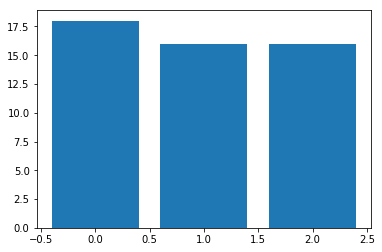

In [148]:
# ATM by Cluster

import matplotlib.pyplot as plt 
%matplotlib inline

df_stat = df_ven_bank.groupby('Clus_km')['VenuesID'].count().reset_index(name ='num_ven')

plt.bar(df_stat['Clus_km'], df_stat['num_ven'])

## Map Visualization

In [147]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Conrad Hotel
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Conrad Hotel',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add circle color by segment

lColors = ['blue','red','green']

for i in range (len(df_ven_bank.Clus_km.unique())):
    df_map = df_ven_bank[df_ven_bank.Clus_km == df_ven_bank.Clus_km.unique()[i]]

    for lat, lng, label in zip(df_map.lat, df_map.lng, df_map.VenuesName):
        folium.features.CircleMarker(
            [lat, lng],
            radius=5,
            color=lColors[i],
            popup=label,
            fill = True,
            fill_color=lColors[i],
            fill_opacity=0.6
        ).add_to(venues_map)

# display map
venues_map

From map, I can see all transaction place of bank locate at center. Blue terminal is place with many office and travel place. K-Mean algorithm some place it far away center. That is a signal to review network transaction at that place.
Base on list of transaction place auto cluster by K-Mean, I need merge with my data in the bank for adjust. Example: position of transaction place, marketing by place customer segment, characteristics of each cluster to support deciding transaction number, transaction position of bank in Ha Noi


# CONCLUSIONS
In this project, I only demonstration my knowledge, that I take after nine courses of IBM Data Science Professional Certificate. It include methodology of data science, python technical to process data, visualization data, using model to support business, the machine learning technical and many tool support for data science: IBM Cloud, Foursquare, many library. It may be do not have enough to apply because missing of data, missing of business requirement, and not enough to research.
 Thank Coursera and Instructor to help me complete this course. That is giving me very interesting time and much love about data science. 
The best interesting thing of me in this course: Data Science is the sexiest job in 21st century.
